# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [23]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = 'C:\python\ML100Days'
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [2]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#使用%matplotlib inline 省略掉plt.show()
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
#平均數以及標準差

for col in app_train:
    if app_train.loc[:,col].dtypes != "O":
        print(col,"(mean,sd): ",f"({app_train.loc[:,col].mean()},{app_train.loc[:,col].std()})")

SK_ID_CURR (mean,sd):  (278180.51857657125,102790.17534842374)
TARGET (mean,sd):  (0.08072881945686496,0.272418645647685)
CNT_CHILDREN (mean,sd):  (0.4170517477423572,0.7221213844389559)
AMT_INCOME_TOTAL (mean,sd):  (168797.9192969845,237123.14627883647)
AMT_CREDIT (mean,sd):  (599025.9997057016,402490.776995946)
AMT_ANNUITY (mean,sd):  (27108.573909183444,14493.737315117392)
AMT_GOODS_PRICE (mean,sd):  (538396.2074288895,369446.4605400129)
REGION_POPULATION_RELATIVE (mean,sd):  (0.02086811205778947,0.013831280122699869)
DAYS_BIRTH (mean,sd):  (-16036.995066843137,4363.988631785526)
DAYS_EMPLOYED (mean,sd):  (63815.04590404896,141275.7665186621)
DAYS_REGISTRATION (mean,sd):  (-4986.120327538419,3522.88632096305)
DAYS_ID_PUBLISH (mean,sd):  (-2994.2023732484367,1509.450419003031)
OWN_CAR_AGE (mean,sd):  (12.061090818687727,11.944811582242346)
FLAG_MOBIL (mean,sd):  (0.9999967480838083,0.0018033070153584427)
FLAG_EMP_PHONE (mean,sd):  (0.8198893698111612,0.38428019893910226)
FLAG_WORK_PH

In [3]:
max_num = app_train.loc[:,"AMT_INCOME_TOTAL"].max()
min_num = app_train.loc[:,"AMT_INCOME_TOTAL"].min()
print(max_num,min_num)

117000000.0 25650.0


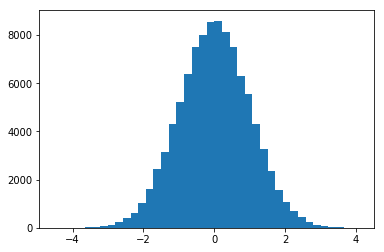

In [16]:
normal_samples = np.random.normal(size = 100000)
plt.hist(normal_samples, bins = 40)
plt.show()